In [53]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [54]:
#on ouvre le centre de donnees du fichhier House 
house_data = pd.read_csv('house.csv')
#print(house_data)
#on affiche les donnee
#plt.plot(house_data['surface'], house_data['loyer'], '*')
#plt.ylabel('loyer')
#plt.xlabel('surface')
#plt.title('nuage de point loyer surface')
#plt.show()

In [55]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[-283.37836117]
 [  40.97116431]]


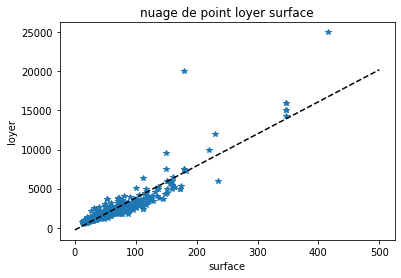

In [56]:
plt.plot(house_data['surface'], house_data['loyer'], '*')
plt.plot([0,500], [theta.item(0),theta.item(0) + 500 * theta.item(1)], linestyle='--', c='#000000')
plt.ylabel('loyer')
plt.xlabel('surface')
plt.title('nuage de point loyer surface')
plt.show()

In [57]:
## traitement avec un model lineaire
from sklearn import linear_model
regr = linear_model.LinearRegression()
### [ [0, i] for i in house_data['surface'].values] la fonction fit prend en entree un truc bidimenssionel x, y et le resulta z
regr.fit([ [0, i] for i in house_data['surface'].values], house_data['loyer'].values)
regr.score([ [0, i] for i in house_data['surface'].values], house_data['loyer'].values)
print(regr.coef_)
print(regr.intercept_)

[ 0.         40.97116431]
-283.37836116658536


In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split([ [0, i] for i in house_data['surface'].values], house_data['loyer'].values, train_size=0.8)
regr.score(xtest, ytest)

0.8649318496779514